<a style="float:left;" href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-Iris/Survol-Science_Des_Donnees-Iris.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<br/>
### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter);
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables;
* Pour obtenir de l'information sur une fonction, utilisez la commande Python `help(`"nom de la fonction"`)`

# Survol de la science des données
## avec le jeu de données des Iris gaspésiens

## Importation des bibliothèques utilisées pour le tutoriel


In [514]:
# Importer toutes les bibliothèques, classes et fonctions 
# utilisées pour le tutoriel dans l'espace de travail
import scipy # bibliothèque de calcul scientifique 
import matplotlib # bibliothèque d'affichage graphique
import sklearn # bibliothèque d'algorithmes "classiques" d'apprentissage automatique 

# Pour de grosses bibliothèques, vous pouvez importer seulement des parties 
# avec from <bibliothèque> import <classe/objet>
# Note: «import *» importe le code de TOUS les paquets (packages), 
from numpy import * # bibliothèque de calcul matriciel
from pandas import * # bibliothèque de manipulation de tableaux de données
from sklearn import * # bibliothèque d'algorithmes "classiques" d'apprentissage automatique

# Important: pour éviter des conflits dans l'espace de nommage, 
# vous pouvez renommer les bibliothèques importées

# Renommages conventionnels: 
## import <bibliothèque> as <abréviation>
# numpy devient «np»
import numpy as np
## matplotlib devient «plt»
import matplotlib.pyplot as plt
# La manière usuelle d'importer Pandas
# Importer la biblothèque Pandas et la renommer «pd» 
import pandas as pd

# Pour de grosses bibliothèques, vous pouvez importer seulement des parties 
# avec from <bibliothèque> import <classe/objet>
# Importer les classes «Series» et «DataFrame» de Pandas
from pandas import Series, DataFrame

# Importer des classes ou fonctions spécifiques d'une bibliothèque 
# from <bibliotheque> import <fonction>
from pandas import DataFrame, read_csv

# Activer l'affichage des graphiques dans la page du Notebook iPython
%matplotlib inline

# Importer IPython afin de pouvoir vérifier sa version et d'afficher des contenus web dans le carnet
import IPython

# Bibliothèque «sys», utilisée uniquement pour obtenir les numéros de versions
import sys 

print("Bibliothèques Python importées")

Bibliothèques Python importées


### Vérification de l'installation

In [515]:
# Vérification des versions des bibliothèques Python importées
print('Version de Python: ',sys.version)
print('Version de IPython: ',IPython.__version__)
print('Version de NumPy: ',np.__version__)
print('Version de Matplotlib: ',matplotlib.__version__)
print('Version de SciPy: ',scipy.__version__)
print('Version de Pandas: ',pd.__version__)
print('Version de Scikit-Learn: ',sklearn.__version__)

Version de Python:  3.9.1 (v3.9.1:1e5d33e9b9, Dec  7 2020, 12:10:52) 
[Clang 6.0 (clang-600.0.57)]
Version de IPython:  7.19.0
Version de NumPy:  1.19.4
Version de Matplotlib:  3.3.4
Version de SciPy:  1.5.4
Version de Pandas:  1.2.0
Version de Scikit-Learn:  0.24.0


## Lecture et chargement des données

Nous allons utiliser le célèbre jeu de de données sur les fleurs d'iris de Gaspésie. 

Rappelons que ce jeu de données contient 150 observations ou exemplaires de fleurs d'iris. Chaque observation comporte quatre attributs (longueur et la largeur des pétales et des sépales) mesurés sur des fleurs d'iris de trois espèces différentes (Iris setosa, Iris versicolor, Iris virginica). 

Cela donne un tableau de cinq colonnes, les quatre premières colonnes contiennent des mesures des fleurs en centimètres. La cinquième colonne contient l'étiquette de classe qui est l'espèce de la fleur observée. 

<ol>
    <li>longueur des sépales en cm</li>
    <li>largeur des sépales en cm</li>
    <li>longueur des pétales en cm</li>
    <li>largeur des pétales en cm</li>
    <li>espèce (étiquette de classe): "Iris-setosa", ou "Iris-versicolor", ou "Iris-virginica"</li>
</ol>

### Téléchargement des données 'iris.data' du site de l'université de Californie à Irvine

<a href="https://archive.ics.uci.edu/ml/index.php/" target="_blank">UCI Machine Learning Repository</a>

Note: le jeu de données 'iris.data' qui est en format .csv (comma separated value), sera téléchargés dans le répertoire local

In [516]:
# Commande Linux pour connaître le chemin du répertoire local
!pwd

/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-Iris


In [517]:
# Commande Linux pour télécharger un fichier è partir de son URL
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
print("Données Iris téléchargées")

--2021-02-17 00:00:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.3’

iris.data.3         100%[===================>]   4.44K  --.-KB/s    in 0.001s  

2021-02-17 00:00:14 (3.46 MB/s) - ‘iris.data.3’ saved [4551/4551]

Données Iris téléchargées


### Lecture des données - fonction Pandas `read_csv()`

In [520]:
# Création d'une liste de noms d'attributs en français
noms_attributs = ["longueur_sépales","largeur_sépales","longueur_pétales","largeur_pétales", "espèce"]

# pd.read_csv(...) cette fonction de Pandas Retourne un Dataframe ou tableau de données analogue à un tableur 
# où chaque ligne représente un exemplaire de données (observations ou exemples) 
# et chaque colonne représente la valeur d'un attribut (ou caractéristique).
donnees_iris_df = pd.read_csv("./iris.data", names=noms_attributs)
print("Données Iris lues et mémorisées dans la variable 'donnees_iris_df'")

Données Iris lues et mémorisées dans la variable 'donnees_iris_df'


## Exploration des données

L’analyse des données débute généralement par l'exploration et la visualisation des données. On cherche ici à se familiariser, mieux comprendre et détecter des éventuelles anomalies comme les données aberrantes. 

### Affichage des premières rangées de données - fonction DataFrame `head()`

In [521]:
# La fonction head() affiche les 5 premières lignes ou rangées du DataFrame
donnees_iris_df.head()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Affichage des dernières rangées des données - fonction DataFrame `.tail()`

In [522]:
# La fonction tail() affiche les 5 dernières rangées ou lignes du DataFrame
donnees_iris_df.tail()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Vues récapitulatives, l'attribut DataFrame `.shape` et les fonctions DataFrame `.info()` et `.describe()`

Une seconde étape consiste à explorer chaque attribut (ou caractéristique) pour en connaître la distribution statistique. Par exemple, les différentes valeurs, l’étendue (valeur minimale, valeur maximale), la moyenne, et la variance. 

#### Format du tableau de données - l'attribut DataFrame `.shape` 

In [523]:
donnees_iris_df.shape

(150, 5)

On voit que le fichier comporte 150 lignes ou exemplaires et 5 colonnes ou attributs

#### Obtenir le nom des colonnes ou attributs du tableau de données - l'attribut DataFframe `.columns` 

In [524]:
donnees_iris_df.columns

Index(['longueur_sépales', 'largeur_sépales', 'longueur_pétales',
       'largeur_pétales', 'espèce'],
      dtype='object')

#### Obtenir les types de données associés aux colonnes du tableau de données -  l'attribut DataFrame `.dtypes` 

In [525]:
donnees_iris_df.dtypes

longueur_sépales    float64
largeur_sépales     float64
longueur_pétales    float64
largeur_pétales     float64
espèce               object
dtype: object

#### Vue récapitulative du tableau de données - fonction DataFrame `.info()`

In [526]:
donnees_iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longueur_sépales  150 non-null    float64
 1   largeur_sépales   150 non-null    float64
 2   longueur_pétales  150 non-null    float64
 3   largeur_pétales   150 non-null    float64
 4   espèce            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Statistiques descriptives globales du tableau de données - fonction DataFrame `.describe()`

Maintenant, examinons notre tableau de données avec la fonction DataFrame `.describe()` 

La fonction `describe()` retourne plusieurs statistiques sommaires d'un seul coup.

In [527]:
donnees_iris_df.describe()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


On voit ci-haut que le DataFrame «donnees_iris_df» comporte 150 rangées qui correspondent à autant d'observations ou exemplaires de données sur les fleurs d'Iris. Par exemple, la longueur moyenne des sépales est 5.84 cm, la longueur minimale des sépales est 4.3 cm, la longueur au 1er quartile Q1 (25%) est de 5.1 cm (i.e. 25% des mesures sont < 5.1 cm)  la médiane Q2 (50%) est de 5.8 cm (i.e. 50% des mesures sont < 5.8 cm), la longueur du 3e quartile (75%) est de 6.4 cm (i.e. 75% des mesures sont < 6.4 cm), la longueur maximale des sépales est 7.9 cm,. 

On remarquera aussi, que les attributs catégoriels comme 'espèce' ne sont pas considérés par la fonction `.describe()`

### Vue par attribut - fonction DataFrame `.unique()`

Pour lister les différentes valeurs possibles d'un attribut, on utilise la fonction `.unique()`

In [528]:
donnees_iris_df['espèce'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [529]:
donnees_iris_df['longueur_sépales'].unique()


array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

Note: Les valeurs `nan`, `NaN` => Not a Number, dénotent le plus souvent des valeurs manquantes. Ici, il y en a pas.

### Examen des distributions des attributs numériques et des attributs catégoriels

#### Boîte à moustaches
Une boîte à moustaches (whisker box) est une méthode d'affichage permettant de représenter graphiquement la distribution des données sur la base de cinq valeurs (le «minimum», le premier quartile (Q1), la médiane (ligne du milieu), le troisième quartile (Q3) et le «maximum»). Un cadre s'étend des valeurs du quartile Q1 au quartile Q3 des données, avec une ligne à la médiane (Q2). Les moustaches s’étendent à partir des bords de la boîte pour indiquer la plage des données.

<img style="float:left;" src="https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@Boi_te_a__moustache.png" width=200/>
<br/>
Note: Dans les boîtes à moustaches plus bas, nous avons ajouté une ligne pointillée pour indiquer la moyenne.

La boîte à moustaches peut renseigner sur les anomalies ou valeurs aberrantes (outliers). Elle peut également vous indiquer à quel point vos données sont groupées et si vos données sont distribuées symétriquement ou asymétriquement.

------------------------------------------------------------------------------------------
Attribut: longueur_sépales , Type: float64


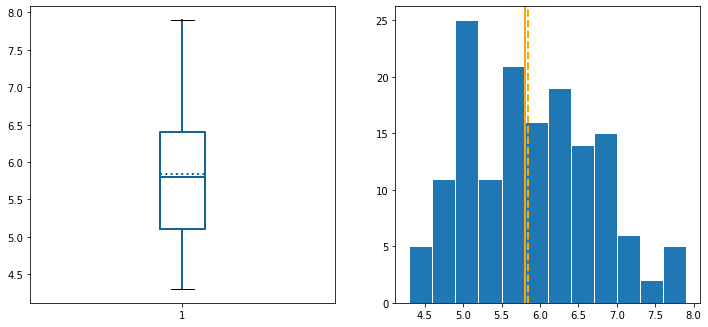


------------------------------------------------------------------------------------------
Attribut: largeur_sépales , Type: float64


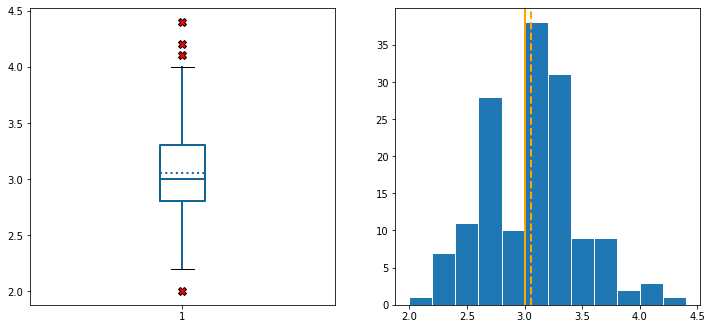


------------------------------------------------------------------------------------------
Attribut: longueur_pétales , Type: float64


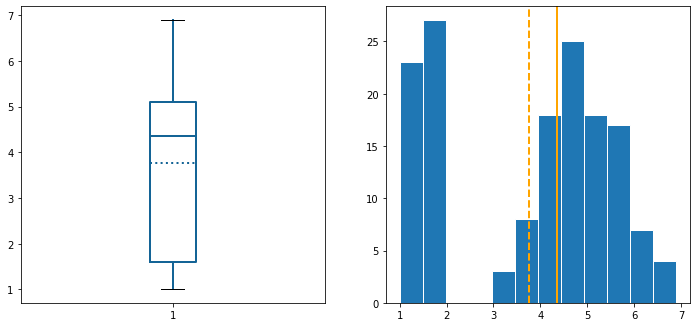


------------------------------------------------------------------------------------------
Attribut: largeur_pétales , Type: float64


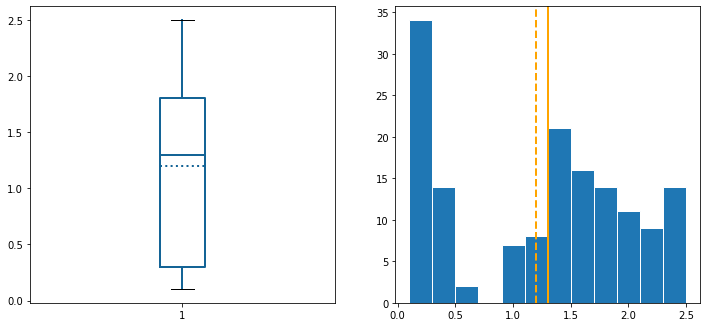


------------------------------------------------------------------------------------------
Attribut: espèce , Type: object
Nombre d'attributs_uniques: 3
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

un_dataframe.groupby('espèce').size()
 espèce
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

------------------------------------------------------------------------------------------


In [666]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.api.types import is_string_dtype, is_numeric_dtype 

NBR_MAX_ATTRIBUTS_AFFICHES = 50

# Créer une boîte à moustaches ou une listes de valeurs possibles
# pour chaque attribut ou colonne d'un tableau de données

# Propriétés pour changer le style des boîtes à moustaches
boite_props = dict(color='#146496',linestyle='solid', linewidth=2, )
anomalies_props = dict(color='red', marker='X', markerfacecolor=None, markersize=8, linewidth=4)
mediane_props = dict(color='#146496', linestyle='solid', linewidth=2)
moyenne_props = dict(color='#146496', marker=None, markeredgecolor=None, linestyle='dotted', linewidth=2)
moustaches_props=dict(color='#146496', linewidth=2)

def examen_distributions_attributs(un_dataframe):
    for attribut in un_dataframe.columns:
        # Afficher le type d'atribut
        print("-"*90)
        print("Attribut:",attribut,", Type:",un_dataframe.dtypes[attribut])
        # Si c'est un attribut catégoriel alors lister toutes les valeurs possibles
        if is_string_dtype(un_dataframe[attribut]):
            attributs_uniques = list(un_dataframe[attribut].unique())
            print("Nombre d'attributs_uniques:",len(attributs_uniques))
            if len(attributs_uniques) > NBR_MAX_ATTRIBUTS_AFFICHES:
                print("Affichage des " + str(NBR_MAX_ATTRIBUTS_AFFICHES) + " premières valeurs:")
                print(attributs_uniques[:NBR_MAX_ATTRIBUTS_AFFICHES])
            else:
                print(attributs_uniques)
                print("\nun_dataframe.groupby('"+attribut+"').size()\n",un_dataframe.groupby(attribut).size())
        if is_numeric_dtype(un_dataframe[attribut]):
            fig = plt.figure(figsize=(12,12))
            plt.subplot(2,2,1)
            plt.boxplot(un_dataframe[attribut],
                        meanline=True,showmeans=True,
                        boxprops=boite_props,
                        flierprops=anomalies_props,
                        medianprops=mediane_props,
                        meanprops=moyenne_props,
                        whiskerprops=moustaches_props,
                       )
            plt.subplot(2,2,2)
            plt.hist(un_dataframe[attribut], 
                     edgecolor='white', 
                     linewidth=1.0, 
                     bins=round(len(un_dataframe[attribut])**0.5))
            plt.axvline(un_dataframe[attribut].mean(), 
                        color='orange', 
                        linestyle='dashed', 
                        linewidth=2)
            plt.axvline(un_dataframe[attribut].median(), 
                        color='orange', 
                        linestyle='solid', 
                        linewidth=2)
        plt.show() 
        print()
    print("-"*90)

examen_distributions_attributs(donnees_iris_df)

### Échantillonnage - fonction Dataframe `.sample()`

En utilisant la fonction `.sample()` de DataFrame, nous allons choisir au hasard 10 exemplaires de données. 


In [531]:
donnees_iris_df.sample(n= 10, random_state=42)

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


### Valeurs manquantes - fonction DataFrame `.isnull()`

Rappel - Les valeurs `nan`, `NaN` => Not a Number, dénotent le plus souvent des valeurs manquantes.
Plusieurs raisons, données non recueillies, données non pertinentes, données gardées secrètes, erreurs de saisie, etc.

In [532]:
print("-"*90)
print("Nombre de valeurs manquantes par attribut (colonne):\n",donnees_iris_df.isnull().sum())
print("-"*90)
print("Nombre total de valeurs manquantes:",donnees_iris_df.isnull().sum().sum())
print("-"*90)

------------------------------------------------------------------------------------------
Nombre de valeurs manquantes par attribut (colonne):
 longueur_sépales    0
largeur_sépales     0
longueur_pétales    0
largeur_pétales     0
espèce              0
dtype: int64
------------------------------------------------------------------------------------------
Nombre total de valeurs manquantes: 0
------------------------------------------------------------------------------------------


Nous constatons que dans le cas du jeu de données Iris, il n'y a pas de valeurs manquantes.

S'il y avait des valeurs manquante, une fois identifiées, il faudrait décider comment traiter ces valeurs manquantes. En gros on a le choix entre leur retrait ou leur remplacement.

### Examen direct des valeurs des attributs - fonction DataFrame `.values`

In [533]:
donnees_iris_df.values


array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

### Recherche des valeurs aberrantes et des cas particuliers (outliers)

À cette étape, il est pertinent de rechercher les valeurs aberrantes (en anglais, outliers) et des cas particuliers. 

Entre autres on jettera un coup d'oeil sur les valeurs `min` et `max` de la fonction `.describe()`

Une fois identifiées, il faudra décider comment traiter ces valeurs aberrantes, avec des techniques analogues aux valeurs manquantes, soit leur retrait ou leur remplacement.

### Retrait d'attributs avec la fonction DataFrame `.drop()`

Utilisation de la fonction pandas `drop()` avec en argument une liste des noms d'attributs à enlever, par exemple ici `['espèces']` et l'axe du DataFrame concerné, ici ce sont les colonnes `axis='columns'` ou `axis=1`.

On peut affecter le résultat à une nouvelle variable, ici `donnees_iris_sans_especes_df`. On peut également réaffecter le résultat à la même variable `donnees_iris_df` ou en utilisant le paramètre `inplace=True` pour éviter l'opération d'affectation.

In [534]:
donnees_iris_sans_espece_df = donnees_iris_df.drop(['espèce'], 
                                                    axis='columns')
donnees_iris_sans_espece_df.head()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Statistiques

* Statistiques de base: compte, fréquence
* Statistiques descriptives: moyenne, écart-type, variance
* Identification de données aberrantes

###  Statistiques primaires - compte / fréquence

* Nombre et fréquence
* Minimum, maximum

#### Note: 

Les statistiques répondent souvent à des questions que l'on se pose sur les données.

### Afficher le nombre d'exemplaires de données (lignes dans le tableau de données)

#### Le nombre de fleurs dans le fichier de données  

In [535]:
print(len(donnees_iris_df))

150


#### Le nombre de fleurs regroupés par espèce - fonction DataFrame `.groupby()`

In [536]:
print(donnees_iris_df.groupby(['espèce']).size())

espèce
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### Trouver la longueur de pétales la plus petite du jeu de données - fonction `.min()` 

In [537]:
print(donnees_iris_df["longueur_pétales"].min())


1.0


#### Trouver la longueur du plus long sépale du jeu de données  - fonction `.max()` 

In [538]:
print(donnees_iris_df["longueur_sépales"].max())


7.9


#### Le nombre de fleurs avec des pétales de 5 cm et plus

In [539]:
print(donnees_iris_df[donnees_iris_df["longueur_pétales"]>= 5]['longueur_pétales'].count())


46


### Statistiques descriptives usuelles - moyenne, médiane, écart-type et variance

* Mesures de tendances centrales: moyenne et médiane
* Mesures de dispersion: variance et écart-type

#### Retour sur la fonction `.describe()`

In [540]:
donnees_iris_df.describe()


,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Quelle est la longueur moyenne des sépales des fleurs du jeu de données - fonction `.mean()` 


In [541]:
print("La longueur moyenne des sépales:",'{:,.2f}'.format(donnees_iris_df['longueur_sépales'].mean()))

La longueur moyenne des sépales: 5.84


#### Quelle est la longueur médiane des sépales des fleurs du jeu de données - fonction `.median()` 

Note: La médiane partage les données en deux groupes égaux: 50% des fleurs ont des sépales moins longs que la médiane et 50% ont des longueurs au dessus de la médiane.

In [542]:
print("La longueur médiane des sépales:",'{:,.2f}'.format(donnees_iris_df['longueur_sépales'].median()))

La longueur médiane des sépales: 5.80


####  Comment se répartit statistiquement la longueur des sépales? - fonctions `.std()` et `.var()`

In [543]:
print("L'écart-type de la longueur des sépales:",'{:,.2f}'.format(donnees_iris_df['longueur_sépales'].std()))
print("La variance de la longueur des sépales:",'{:,.2f}'.format(donnees_iris_df['longueur_sépales'].var()))


L'écart-type de la longueur des sépales: 0.83
La variance de la longueur des sépales: 0.69


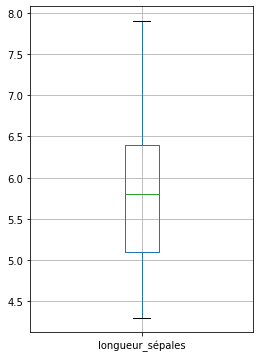

In [544]:
# Avec une boîte à moustaches
_ = donnees_iris_df.boxplot('longueur_sépales', figsize=(4, 6))


## Visualisation des données

Le savoir est le pouvoir, mais pour que la connaissance des données devienne puissance, il faut afficher les résultats de l’analyse des données de manière convaincante. C’est là que la visualisation des données entre en jeu. 
Avec davantage de données disponibles que jamais auparavant, les opportunités de visualisation sont à la fois riches et abondantes.

* La capacité de visualiser et faire comprendre des volumes importants de données, souvent pêle-mêle, et d'y faire ressortir des informations importantes est une compétence clé de la science des données
* Faire parler visuellement des données, faire que les données racontent une histoire

### Motivation - Exemples fameux de visualisation

#### La campagne de Russie
La fameuse visualisation de la campagne de Russie de Napoléon par <a href="https://fr.wikipedia.org/wiki/Charles_Joseph_Minard">Charles Joseph  Minard</a>
<p>Le plus important à savoir est que la largeur du tracé représente le nombre de soldats de la Grande Armée de Napoléon de 1804 à 1814. On la voit rétrécir tout le long de la campagne de Russie à l'aller (en marron) jusqu'à Moscou, pour revenir en France décimée (en noir), sous la forme d'un mince filet.</p>
<br/>
<figure style="text-align:center">
  <img src="https://cours.edulib.org/asset-v1:Cegep-Matane+VAERN.1FR+P2021+type@asset+block@ScDo-Minard.png" width='900' />
  <figcaption>Visualisation des pertes de la campagne napoléonienne de Russie 1812-1813 - Source: <a href="https://fr.wikipedia.org/wiki/Charles_Joseph_Minard#/media/Fichier:Minard.png" target="_blank">Wikipédia</a></figcaption>
</figure>

#### Visualisation de l'évolution de l'économie mondiale depuis 200 ans  

Présentation de <a href="https://fr.wikipedia.org/wiki/Hans_Rosling">Hans Rosling</a>, statisticien, médecin spécialiste de la santé publique, conférencier, auteur de <a href="https://www.lemonde.fr/m-actu/article/2018/09/13/factfulness-le-livre-qui-demele-le-fait-du-faux_5354297_4497186.html">Factfulness</a> et fondateur de <a href="https://www.gapminder.org/">Gapminder</a>. Décédé en 2017. M. Rosling réalise des visualisations percutantes de données statistiques sur le développement économique et la santé sur le plan international.
Source: YouTube 

In [545]:
from IPython.display import Audio,Image, YouTubeVideo
id='jbkSRLYSojo'
YouTubeVideo(id=id,width=600,height=300,hl='fr',cc_lang_pref='fr')

#### D'autres exemples de visualisation de haute qualité

* The year in news - http://bit.ly/2oH9Ayh
* Nikon - Universcale - http://bit.ly/2JLyZOp
* Échelle de temps - http://hereistoday.com/
* D’où vient le café - http://www.bizbrain.org/coffee/
* Le commerce mondial - https://viz.ged-project.de/
* Les fuites d’information - http://bit.ly/2oKWujA
* La circulation des vents - http://bit.ly/34r4Hsh
* Les voyages internationaux - http://bit.ly/2qfP744
* Acheter ou louer un appartement - NY Times - https://nyti.ms/34vm4IB
* Chronologie de la musique - Google - http://bit.ly/2NBkyxD
* Les arbres de New-York - Cloudred - http://bit.ly/2WEdrZj
* La diversité des générations - https://cnn.it/2qfSloc
* Comment réduire les GES - http://bit.ly/2oDIiZs
* Le Climatoscope - revue - http://bit.ly/2WEo9it
* Les animaux disparus - James Round - http://bit.ly/2N9f2U0
* Daily Routines - https://podio.com/site/creative-routines

### Visualisation simple - exemples


#### Tarte / camembert de la distribution des valeurs d'un attribut

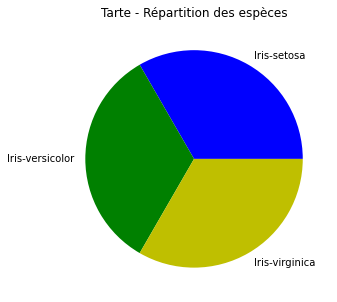

In [546]:
from matplotlib import pyplot as plt
_ = plt.figure(figsize=(5, 5))
(donnees_iris_df.groupby(['espèce']).size()).plot(kind='pie', 
                                                 colors=['b','g','y'],
                                                 title=u"Tarte - Répartition des espèces")
plt.ylabel("") # to remove None label on y-axis
plt.show()

#### Histogramme vertical de la distribution des valeurs d'un attribut

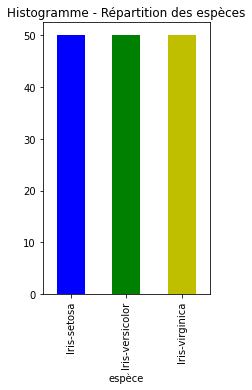

In [547]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3, 5))
(donnees_iris_df.groupby(['espèce']).size()).plot(kind='bar', 
                                                 color=['b','g','y'],
                                                 title=u"Histogramme - Répartition des espèces")
plt.show()


#### Histogramme horizontal de la distribution des valeurs d'un attribut

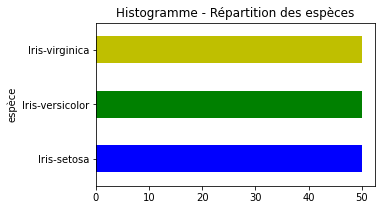

In [548]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 3))
(donnees_iris_df.groupby(['espèce']).size()).plot(kind='barh', 
                                                 color=['b','g','y'], 
                                                 title=u"Histogramme - Répartition des espèces")
plt.show()


### Visualisation des relations entre les attributs

Une étape importante dans l'analyse des données est la recherche de relations entre des attributs (ou variables) qui caractérisent nos données.

Parmi les analyses typiques, nous avons la recherche de corrélations, d'information mutuelle et la covariance.


#### Analyse des corrélations - fonction `.corr()`

Les étapes suivantes de l'analyse des données vont s’attacher à trouver des corrélations, à relever des tendances, identifier des relations, reconnaître des formes, des structures et des comportements et même faire des prédictions.

En science des données on utilise principalement la corrélation pour comprendre la relation entre les variables.Par exemple examinons les différentes corrélations entre les attributs du jeu de données des fleurs d'iris.

En statistique, la corrélation entre variables dénote une dépendance. Le plus souvent, il s'agit de la corrélation linéaire ou coefficient de corrélation de Pearson toujours compris entre 0 et 1. Un coefficient nul n’implique pas indépendance, car d’autres types de corrélation sont possibles. Attention! Le fait que deux variables soient « fortement corrélées » n'implique pas qu'il y ait une relation de causalité.

Les corrélations peuvent être positives (les deux variables croissent), négatives (une variable baisse pendant que l'autre croît) ou nulles (non corrélées). 

#### Transformation d'un attribut catégoriel en attributs binaires - fonction Pandas `get_dummies()`

On peut transformer un attribut catégoriel en n attributs binaires selon un encodage binaire à un seul bit discriminant (en anglais, one-hot encoding)

In [549]:
donnees_iris_bin_df = pd.get_dummies(donnees_iris_df,prefix=['espèce'], columns = ['espèce'])
donnees_iris_bin_df.head()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce_Iris-setosa,espèce_Iris-versicolor,espèce_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [550]:
donnees_iris_bin_df.corr()

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce_Iris-setosa,espèce_Iris-versicolor,espèce_Iris-virginica
longueur_sépales,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
largeur_sépales,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
longueur_pétales,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
largeur_pétales,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
espèce_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
espèce_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
espèce_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


#### Visualisation des corrélations - corrélogramme
Maintenant rendons ces résultats plus visibles en ajoutant de la couleur...
Ici le rouge indique une corrélation positive, le blanc la neutralité et le bleu une corrélation négative. Évidemment, la diagonale est rouge vif!

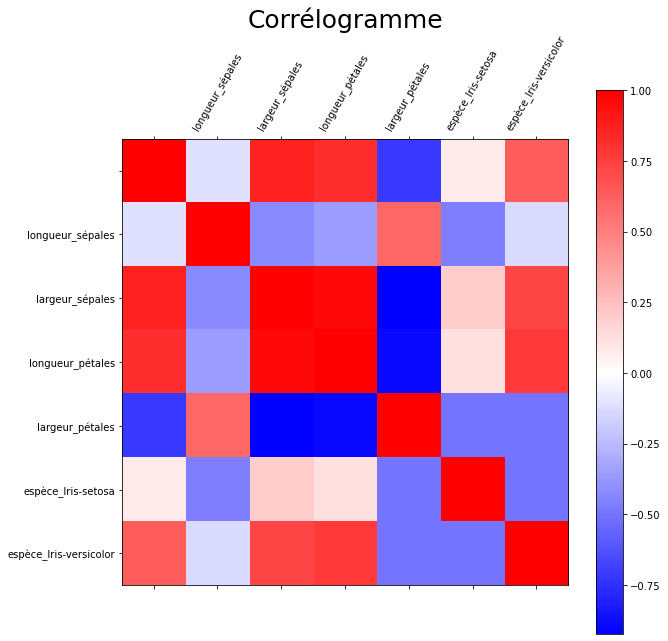

In [612]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

# Une rustine un peu compliquée pour faire correspondre 0.0 à la couleur blanche
# https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib/20146989#20146989
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

norm = MidpointNormalize(midpoint=0)
    
alpha = ["longueur_sépales","largeur_sépales","longueur_pétales","largeur_pétales",
         "espèce_Iris-setosa","espèce_Iris-versicolor","espèce_Iris-virginica"]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(donnees_iris_bin_df.corr(), norm=norm, cmap='bwr', interpolation='nearest')
fig.colorbar(cax)

# 2 lignes suivantes, une rustine pour éviter un avertissement
# UserWarning: FixedFormatter should only be used together with FixedLocator
# https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
ticks_loc = ax.get_xticks().tolist()[1:]
ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
# Afficher les noms des attributs selon l'axe horizontal
ax.set_xticklabels(['']+alpha,rotation=60)

# 2 lignes suivantes, une rustine pour éviter un avertissement (voir plus haut)
ticks_loc = ax.get_yticks().tolist()[1:]
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
# Afficher les noms des attributs selon l'axe vertical
ax.set_yticklabels(['']+alpha)

plt.title("Corrélogramme",fontsize=25)
plt.show()

##### Résultats

On voit que:

* "espèce_Iris-setosa"
    * corrélée moyennement positivement avec largeur_sépales
    * corrélée fortement négativement avec longueur_sépales, longueur_pétales, largeur_pétales
* "espèce_Iris-versicolor"
    * corrélée faiblement positivement avec longueur_pétales
    * corrélée moyennement négativement avec largeur_sépales
* "espèce_Iris-virginica"
    * corrélée fortement positivement avec largeur_pétales
    * corrélée moyennement positivement avec longueur_sépales, longueur_pétales
    * corrélée faiblement négativement avec largeur_sépales

#### Analyse de l'information mutuelle

L'information mutuelle révèle une association, que l'association soit linéaire (ce que mesure la corrélation) ou non, alors que la corrélation peut être nulle et que les variables peuvent encore être stochastiquement dépendantes.

In [552]:
# Code from: Entropy in machine learning - may 06 2019 - Francesco Gadaleta
# https://gist.github.com/rlangone/71d93b68d38a89c6722f414fc96f4792

# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr
from numpy import histogram2d
from sklearn.metrics import mutual_info_score

# Define mutual information function
def mutual_info(x, y):
    # Compute mutual information between x and y
    bins_x = max(2,int(2*iqr(x)*len(x)**-(1/3))) # use Freedman-Diaconis's Rule of thumb
    bins_y = max(2,int(2*iqr(y)*len(y)**-(1/3)))
    c_xy = histogram2d(x, y, [bins_x,bins_y])[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

# Build MI matrix
num_features = donnees_iris_bin_df.shape[1]
MI_matrix = np.zeros((num_features,num_features))
for i,col_i in enumerate(donnees_iris_bin_df):
    for j,col_j in enumerate(donnees_iris_bin_df):
        MI_matrix[i,j] = mutual_info(donnees_iris_bin_df[col_i],donnees_iris_bin_df[col_j])
MI_df = pd.DataFrame(MI_matrix,columns = donnees_iris_bin_df.columns, index = donnees_iris_bin_df.columns)
MI_df

,longueur_sépales,largeur_sépales,longueur_pétales,largeur_pétales,espèce_Iris-setosa,espèce_Iris-versicolor,espèce_Iris-virginica
longueur_sépales,0.675622,0.016420,0.306132,0.297893,0.229790,0.000046,0.184890
largeur_sépales,0.016420,0.657158,0.085840,0.068399,0.151876,0.086699,0.012611
longueur_pétales,0.306132,0.085840,0.675622,0.479054,0.444612,0.037888,0.229790
largeur_pétales,0.297893,0.068399,0.479054,0.684232,0.402426,0.018512,0.252601
espèce_Iris-setosa,0.229790,0.151876,0.444612,0.402426,0.636514,0.174416,0.174416
espèce_Iris-versicolor,0.000046,0.086699,0.037888,0.018512,0.174416,0.636514,0.174416
espèce_Iris-virginica,0.184890,0.012611,0.229790,0.252601,0.174416,0.174416,0.636514


#### Visualisation de relations avec une matrice de nuage de points

<strong>Matrice de nuage de points</strong>

Une matrice de nuage de points (en anglais, scatter plot matrix) montre tous les nuages de points par paire d'attributs (ou variables) dans une seule vue selon une matrice ou grille carrée. Donc, pour K attributs, la matrice de nuage de points comprendra K lignes et K colonnes. Chaque nuage de points représente graphiquement la relation entre deux attributs (ou relation bivariée). La matrice de nuage de points permet donc de visualiser de nombreuses relations dans un seul diagramme.

La diagonale de la matrice représente la relation d'un attribut avec lui-même, ce qui n'est pas vraiment intéressant. On la remplace par un histogramme montrant la distribution de l'attribut numérique. 

<strong>Nuage de points</strong>

Un nuage de points (parfois appelé diagramme de dispersion) affiche un ensemble de points selon des coordonnées cartésiennes. La valeur d'un attribut détermine la position du point sur l'axe horizontal (ou axe x, abscisse) et la valeur de l'autre attribut détermine la position sur l'axe vertical (ou axe y, ordonnée). Un nuage de points suggère différents types de relations entre deux attributs (ou relations bivariées). 

<strong>Interprétation de la forme du nuage de points</strong>

Visuellement, si la forme du nuage de points monte du bas à gauche vers le haut à droite, cela indique une corrélation positive entre les attributs étudiées. Si la forme du nuage de points descend du haut à gauche vers le bas à droite, cela indique une corrélation négative. Enfin, si la forme du nuage de points reste plutôt horizontale ou verticale cela signifie une corrélation nulle. 

La pente plus ou moins forte d'une droite de régression selon l'axe principal du nuage de points nous renseigne sur l'intensité de la corrélation, une pente plus forte étant associée à une corrélation plus forte.

Note: On peut également colorer les points, modifier leur formes ou leur taille, selon différents critères dont l'étiquette-cible.

* Article de <a href="http://benalexkeen.com/scatter-matrices-using-pandas/">Ben Alex Keen</a> 

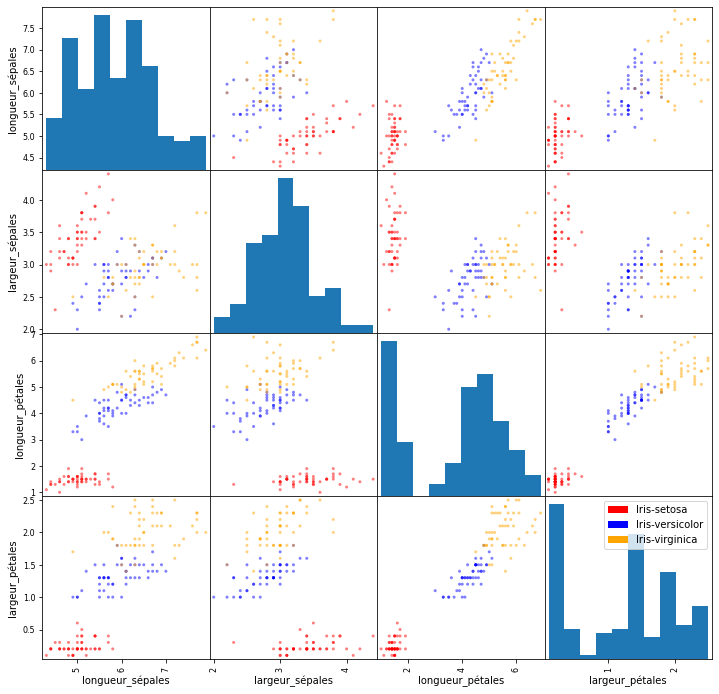

In [613]:
import matplotlib.patches as mpatches

carte_couleurs = {"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"orange"}
liste_couleurs = list(map(lambda x:carte_couleurs.get(x),donnees_iris_df["espèce"]))
# diagonal peut être hist (histogramme) ou kde (Kernel Density Estimation) 
matrice_dispersion = pd.plotting.scatter_matrix(donnees_iris_df, diagonal="hist", c=liste_couleurs, figsize=(12,12))
# https://stackoverflow.com/questions/43217174/how-can-the-sizes-and-rotations-of-text-of-a-pandas-scatter-matrix-be-set
for ax in matrice_dispersion.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
# https://stackoverflow.com/questions/26558816/matplotlib-scatter-plot-with-legend
legende = []
for c in range(0,len(set(liste_couleurs))):
    legende.append(mpatches.Rectangle((0,0),1,1,fc=(list(carte_couleurs.values()))[c]))
plt.legend(legende,tuple(carte_couleurs.keys()),loc='best')
plt.show()

## Ressources utiles

1) Pandas - https://pandas.pydata.org

2) Tutoriels Pandas - https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

3) Aide mémoire Pandas - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

4) Expressions régulières - http://regex101.com/ - https://www.regular-expressions.info/tutorial.html

5) Matplotlib - https://matplotlib.org/

6) Tutoriels Matplotlib - https://matplotlib.org/3.1.1/tutorials/index.html

7) Aide-mémoire Matplotlib - https://go.aws/2V5J9jz

8) Seaborn - (Surcouche graphique à matplotlib) - https://seaborn.pydata.org/

9) Pygal - (Bibliothèque graphique Python, surtout pour les cartes géographiques) - http://www.pygal.org/

10) StackOverflow - https://stackoverflow.com